# Visualização de Dados

In [1]:
#pacote de manipulação de dados
import pandas as pd

# pacote de visualização de dados
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/base_dados_vendas_tratada.csv", parse_dates = ['dt_venda', 'dt_entrega'], index_col = 'dt_venda')
df.head()

,matricula_funcionario,nome_funcionario,cargo,codigo_loja,nome_loja,codigo_produto,descricao_produto,categoria,preco_custo,valor_unitario,quantidade,dt_entrega,valor_final
dt_venda,,,,,,,,,,,,,
2020-08-25 10:04:00,123456999,Felipe Marinho,Vendedor,CL003,Filial SP,10013,Fogão,Eletrodomésticos,210.9,404.1,3,2020-08-31 16:39:00,1212.3
2020-06-10 15:34:00,123456999,Felipe Marinho,Vendedor,CL003,Filial SP,10011,Liquidificador,Cozinha,59.9,142.4,2,2020-06-11 13:59:00,284.8
2019-03-21 15:58:00,123456999,Felipe Marinho,Vendedor,CL003,Filial SP,10013,Fogão,Eletrodomésticos,210.9,404.1,2,2019-03-28 09:44:00,808.2
2019-09-16 14:46:00,123456999,Felipe Marinho,Vendedor,CL003,Filial SP,10004,Máquina Lavar Roupa,Eletrodomésticos,1099.0,1709.1,2,2019-09-20 09:22:00,3418.2
2019-11-25 16:28:00,123456999,Felipe Marinho,Vendedor,CL003,Filial SP,10005,Notebook,Eletrônicos,2299.9,3199.0,2,2019-11-26 13:42:00,6398.0


In [6]:
df['ano_mes'] = df.index.to_period("M")

In [9]:
df_vendas_mensal = df.groupby('ano_mes')['valor_final'].sum()

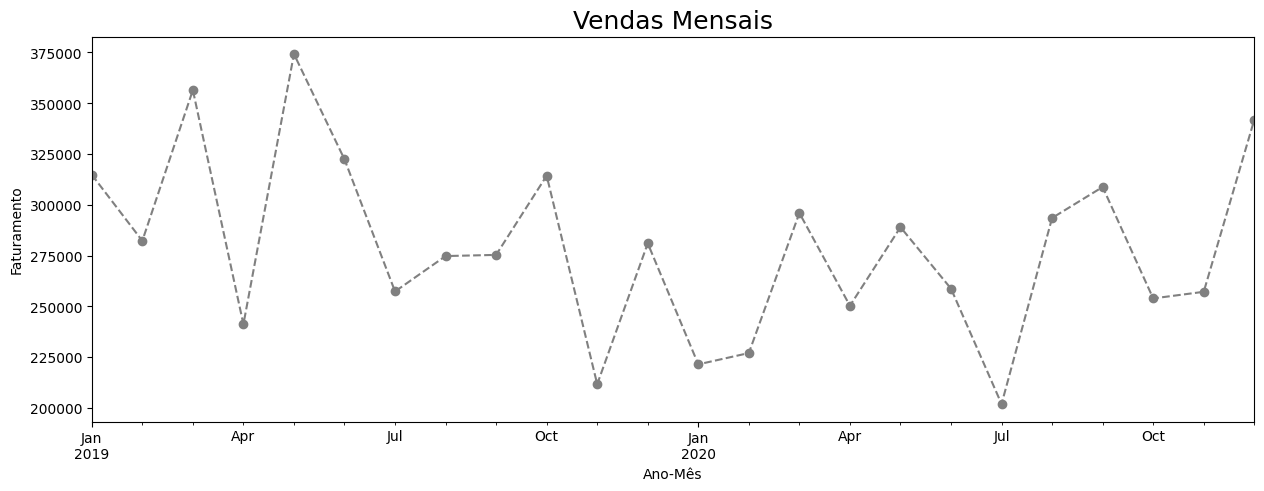

In [29]:
df_vendas_mensal.plot(kind = 'line', figsize = (15,5), linestyle = '--', color = 'gray', marker = 'o')
plt.title('Vendas Mensais', fontsize = '18')
plt.xlabel('Ano-Mês', fontsize = '10')
plt.ylabel('Faturamento', fontsize = '10');

In [51]:
# Análise de Produtos
# Total de vendas por produto

df_vendas_produto = df.groupby('descricao_produto').agg(
    total_vendas = ('valor_final', 'sum'),
    total_quantidade = ('quantidade', 'sum')
)
df_vendas_produto = df_vendas_produto.sort_values(by = 'total_vendas', ascending= False)

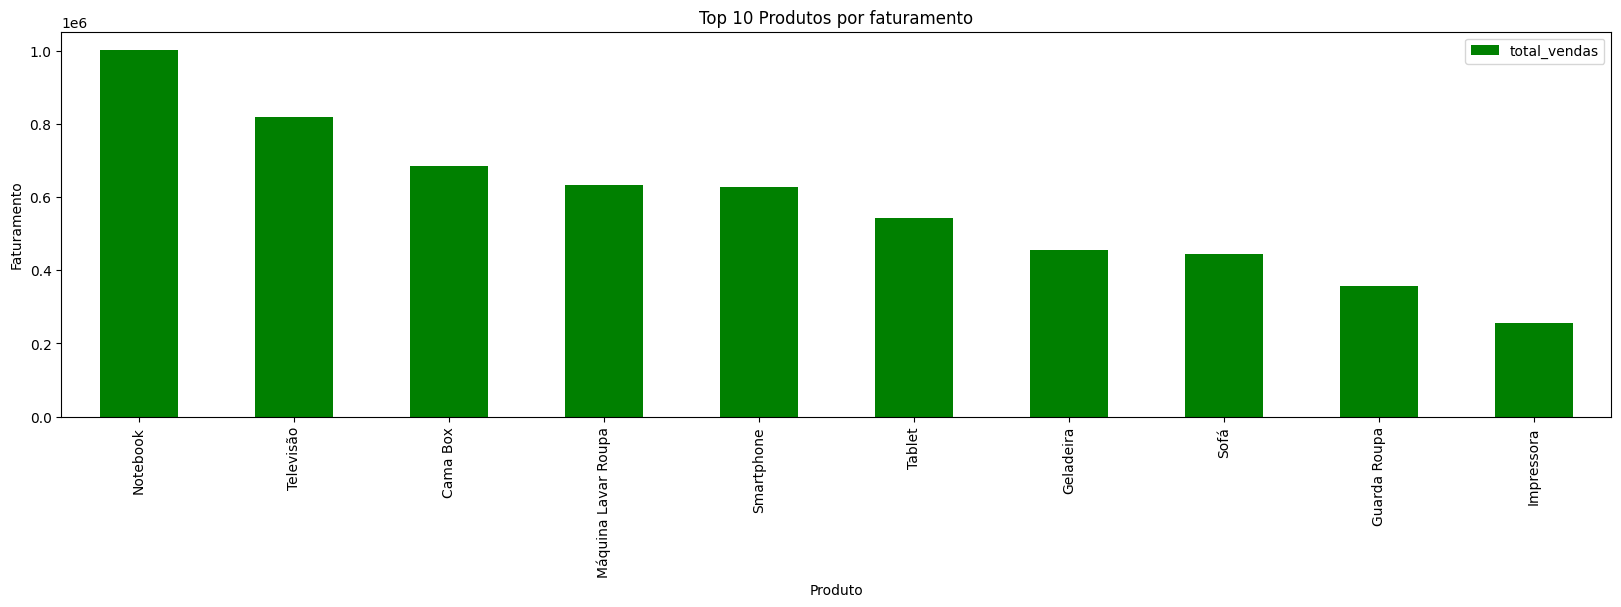

In [59]:
df_vendas_produto.head(10).plot(kind = 'bar', figsize = (20,5), y = 'total_vendas', color = 'green')
plt.title("Top 10 Produtos por faturamento")
plt.xlabel('Produto')
plt.ylabel('Faturamento');

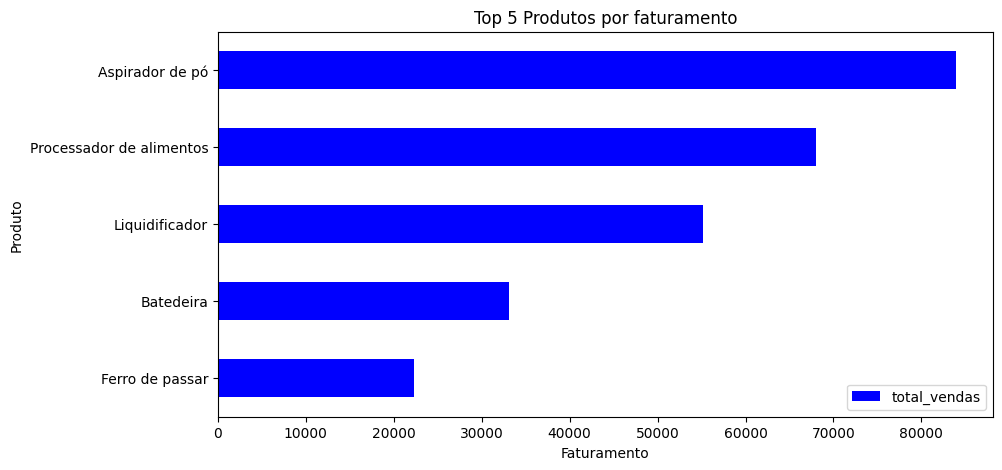

In [71]:
df_vendas_produto = df_vendas_produto.sort_values(by = 'total_vendas', ascending= True)
df_vendas_produto.head().plot(kind = 'barh', figsize = (10,5), y = 'total_vendas', color = 'blue')
plt.title("Top 5 Produtos por faturamento")
plt.xlabel('Faturamento')
plt.ylabel('Produto');

<Axes: ylabel='valor_final'>

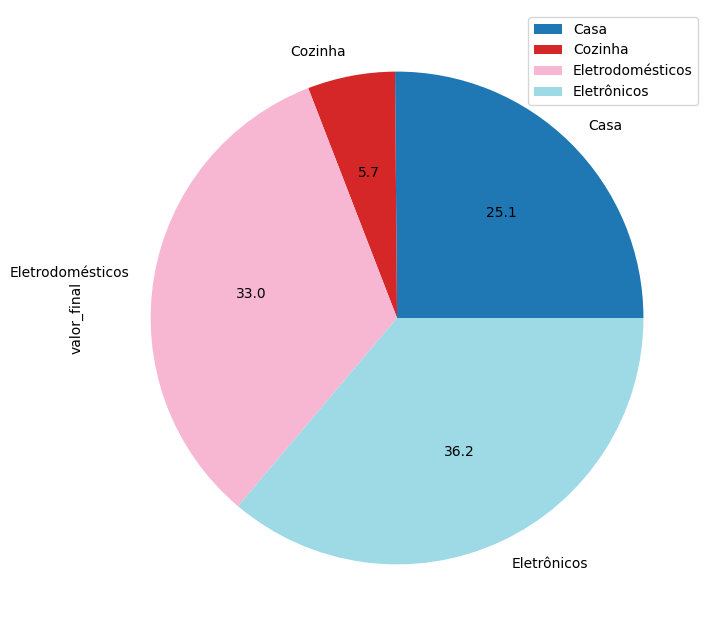

In [86]:
df_categoria_valfinal = df.groupby('categoria')['valor_final'].sum()
plt.figure(figsize = (8,8))
df_categoria_valfinal.plot.pie(autopct= '%1.1f', cmap = 'tab20', legend = True)